In [2]:
from preamble import *
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:100% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:100%; line-height:1.0; overflow: visible;} .output_subarea pre{width:100%}</style>''') # For slides
#HTML('''<style>html, body{overflow-y: visible !important} .output_subarea{font-size:100%; line-height:1.0; overflow: visible;}</style>''') # For slides
InteractiveShell.ast_node_interactivity = "all"

## Agenda

- Introduction and Motivation
- Artificial Neuron
- Gradient Descent
- Backpropagation
- **Perceptron**
- Multilayered Perceptron
- MLP Classification
- Model Design
- Optimization

- Convolutional Neural Network
- Recurrent Neural Network

![Classify Data](images/classify-data.png)


- Input: $x_0$, $x_1$
- Output is $f_c(\mathbf{x}) = P(y=c|\mathbf{x})$


## Artificial Neuron Classification 
![Neuron](images/neuron-classification.png)
- Input: by $x_0$, $x_1$, vector notation $\mathbf{x}$
- Edge parameters: $\mathbf{w}$ + bias term $b$
- A single neuron implements:
$$ o(x; \theta) = \phi(\sum_{i} {w_i x_i} + b) = \phi(\mathbf{w}^\top \mathbf{x})$$
$$\phi(\mathbf{x}) = logit(\mathbf{w}^T \mathbf{x}) = \frac{1}{1+e^{-\mathbf{w}^\top \mathbf{x}}}$$
- Bounded from 0 to 1. Smooth, positive function.
![Sigmoid functin](images/sigmoid.png)

## Binary classification
- Output is $o_c(\mathbf{x}) = P(y=c|\mathbf{x})$
- $o_1(\mathbf{x}) = P(y=1|\mathbf{x}) = \phi(\mathbf{w}^\top \mathbf{x}) = logit(\mathbf{w}\top \mathbf{x})$ 
- $o_0 = (1 - o_1)$

### Gradient Descent Optimization:
- Model: 
    - $o_\mathbf{\theta} = logit(\mathbf{w}^\top x + b) = \frac{1}{1+e^{-\mathbf{w}^\top \mathbf{x} + b}}$
    - $\theta : \{\mathbf{w}, b\}$
    
- Loss function: 
    - $L(\mathbf{x}, y; \theta) = - \sum_c 1_{(y=c)} \log\ o_c = -log\ o_y$
    - Log for numerical stability and math simplicity

- Gradient of $L$ wrt $\mathbf{w}$ and $b$:
    
    - $\frac{\partial}{\partial w}{L(.)}$ for both $w_0$ and $w_1$
    - $\frac{\partial}{\partial b}{L(.)}$

## Compute Graph
- $\frac{\partial{L}}{\partial{L}}=1$
- $\frac{\partial{L}}{\partial{o}}=\frac{\partial -\log\ o}{\partial o}=-\frac{1}{o}$
- $\frac{\partial{o_\theta(\mathbf{x})}}{\partial \theta}=\frac{\partial{logit(\mathbf{x}; \theta)}}{\partial \theta}=(1-logit(\mathbf{x}; \theta))(logit(\mathbf{x};\theta))$
![Compute Graph Classification](images/compute-graph-classification.png)

## Implementation 

### Tensforflow

In [3]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [4]:
# Training Data
train_X = numpy.asarray([[-0.4, 0.3], [-0.3, -0.1], [-0.2, 0.4], [-0.1, 0.1], [0.1, -0.5], [0.2, -0.9], [0.3, 0.2], [0.4, -0.6]])
train_Y = numpy.asarray([[1], [1], [1], [1], [0], [0], [0], [0]])
n_samples = train_X.shape[0]

In [5]:
# Parameters
learning_rate = 0.01
training_epochs = 25
display_step = 1

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 2]) # input data
y = tf.placeholder(tf.float32, [None, 1]) # lables

# Set model weights
W = tf.Variable(tf.zeros([2, 1]))
b = tf.Variable(tf.zeros([1]))

# Construct model
pred = tf.sigmoid(tf.matmul(x, W) + b) # Sigmoid activation

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

In [6]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        # Training loop
        _, c = sess.run([optimizer, cost], feed_dict={x: train_X, y: train_Y})
        
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), 
                   "W=", numpy.array_str(sess.run(W)).replace('\n', ',')
                   , "b=", sess.run(b))

    print ("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    
    # Calculate accuracy on training data
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print ("Accuracy:", accuracy.eval({x: train_X, y: train_Y}))

Epoch: 0001 cost= 0.346573591 W= [[-0.001], [ 0.   ]] b= [ 0.002]
Epoch: 0002 cost= 0.345890850 W= [[-0.001], [ 0.001]] b= [ 0.005]
Epoch: 0003 cost= 0.345209986 W= [[-0.002], [ 0.001]] b= [ 0.007]
Epoch: 0004 cost= 0.344530970 W= [[-0.002], [ 0.002]] b= [ 0.01]
Epoch: 0005 cost= 0.343853831 W= [[-0.003], [ 0.002]] b= [ 0.012]
Epoch: 0006 cost= 0.343178540 W= [[-0.004], [ 0.003]] b= [ 0.015]
Epoch: 0007 cost= 0.342505097 W= [[-0.004], [ 0.003]] b= [ 0.017]
Epoch: 0008 cost= 0.341833472 W= [[-0.005], [ 0.003]] b= [ 0.02]
Epoch: 0009 cost= 0.341163725 W= [[-0.006], [ 0.004]] b= [ 0.022]
Epoch: 0010 cost= 0.340495765 W= [[-0.006], [ 0.004]] b= [ 0.025]
Epoch: 0011 cost= 0.339829654 W= [[-0.007], [ 0.005]] b= [ 0.027]
Epoch: 0012 cost= 0.339165390 W= [[-0.007], [ 0.005]] b= [ 0.03]
Epoch: 0013 cost= 0.338502884 W= [[-0.008], [ 0.006]] b= [ 0.032]
Epoch: 0014 cost= 0.337842226 W= [[-0.009], [ 0.006]] b= [ 0.035]
Epoch: 0015 cost= 0.337183416 W= [[-0.009], [ 0.006]] b= [ 0.037]
Epoch: 0016 c

(-1, 1)

(-1, 1)

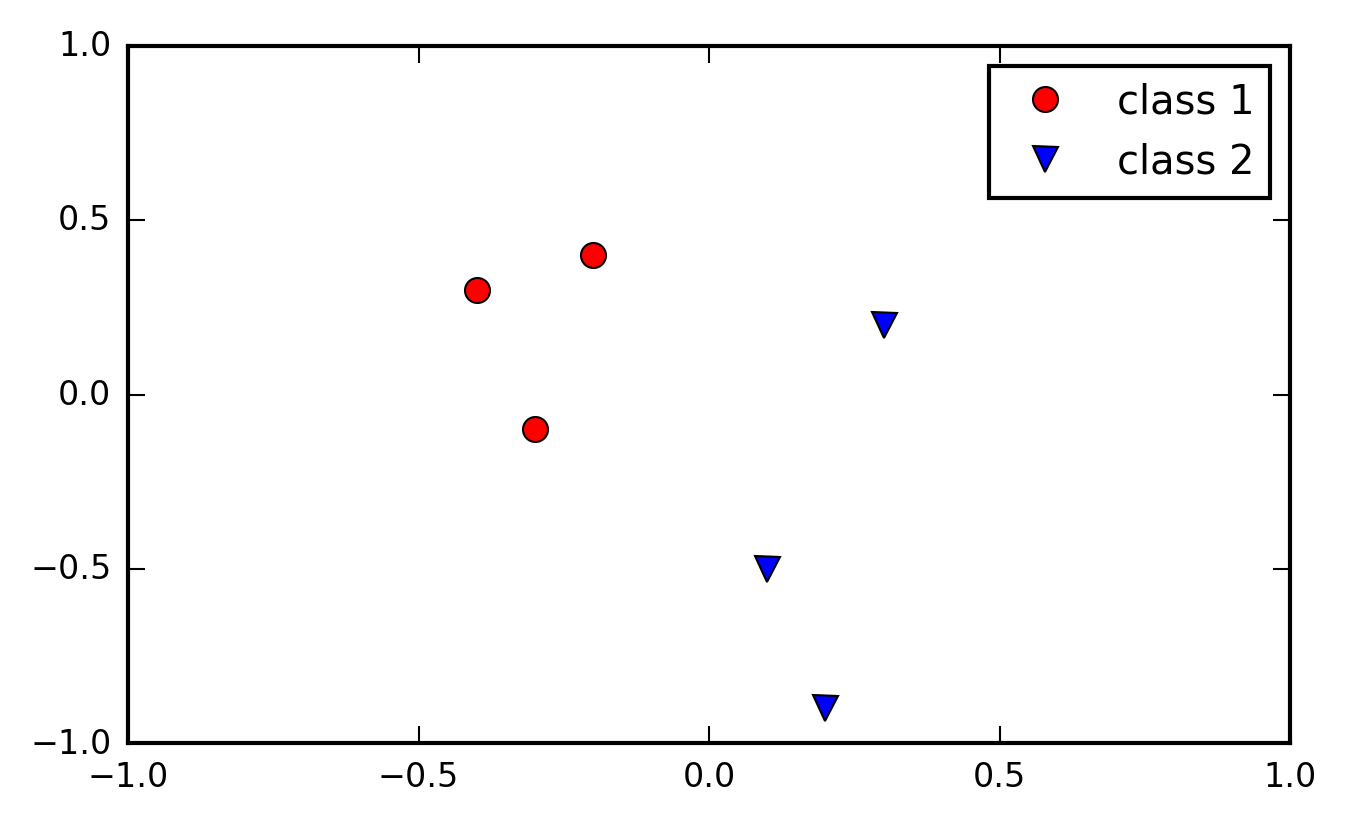

In [20]:
#Graphic display

plt.plot(train_X[0:3, 0], train_X[0:3, 1],  'ro', label='class 1')
plt.plot(train_X[4:7, 0], train_X[4:7, 1],  'bv', label='class 2')
#plt.plot(train_X, [-0.01536841,  0.01075379],  b= [ 0.06148605], label='Classifier boundary')

plt.ylim(-1, 1)
plt.xlim(-1, 1)

plt.legend()
plt.show()

### Can solve linearly separable classes
![xor visualization](images/xor-visualization.png)


### However, it cannot solve linearly not separable
![xor visualization](images/xor-visualization2.png)



### Linearly separable data
![Training single neuron](images/training-single-neuron-start.png)

### Linearly separable data (converged)
![Training single neuron](images/training-single-neuron-end.png)

### Linearly not separable data
![Training single neuron](images/training-single-neuron-non-start.png)

### Linearly not separable data (after training)
![Training single neuron](images/training-single-neuron-non-end.png)